In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
def import_and_clean_data(path):
    data = np.genfromtxt(path, delimiter='\t', skip_header=2, unpack=True)
    
    return np.array(data)

In [3]:
def plot_pos(x_data, y_data, title="Plot"):
    plt.plot(x_data, y_data)  
    plt.title('Plot')  
    plt.ylabel('y')
    plt.xlabel('x')
    plt.draw()  
    plt.show()  


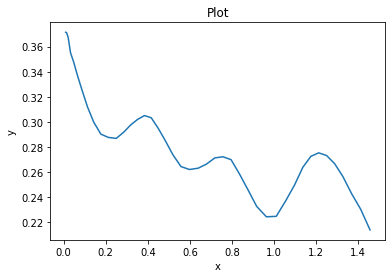

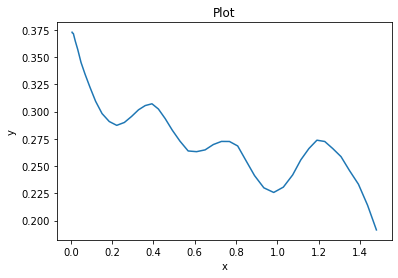

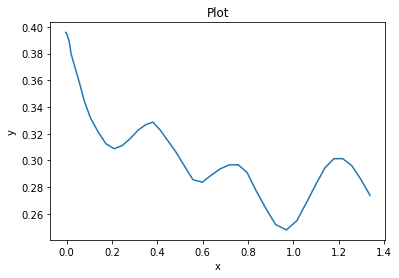

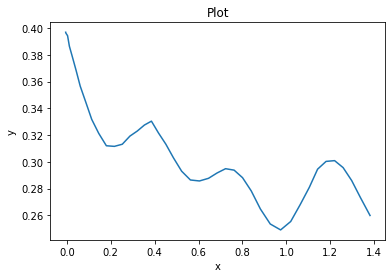

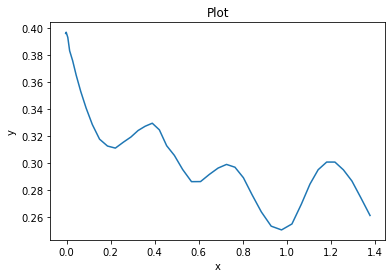

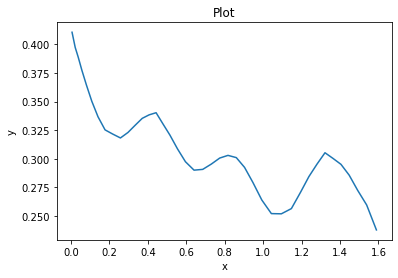

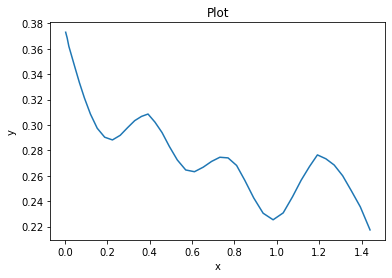

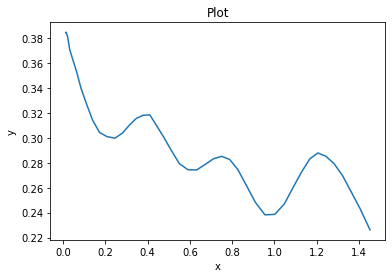

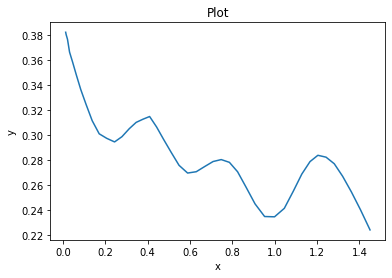

In [4]:
runs = []
for i in range(1, 10):
    runs.append(import_and_clean_data(f"txy_9_{i}.csv"))

for run in runs:
    # Plots y distance over time
    # 0 is time, 1 is x, and 2 is y
    plot_pos(run[1], run[2])

In [5]:
def get_speed(data):
    time = data[0]
    x_pos = data[1]
    y_pos = data[2]
    dt = time[1:] - time[:-1]
    dx = x_pos[1:] - x_pos[:-1]
    dy = y_pos[1:] - y_pos[:-1]
    vx = dx/dt
    vy = dy/dt

    speeds = np.sqrt(np.square(vx)+np.square(vy))
    return speeds


In [6]:
def plot_speed(x_data, y_data, title="Plot"):
    plt.plot(x_data, y_data)  
    plt.title('Plot')  
    plt.ylabel('speed')
    plt.xlabel('time')
    plt.draw()  
    plt.show()  

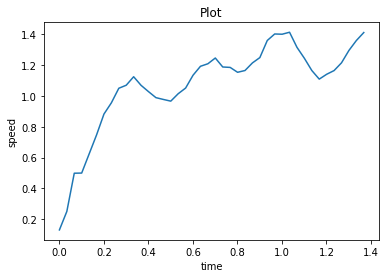

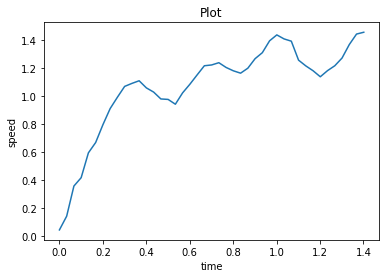

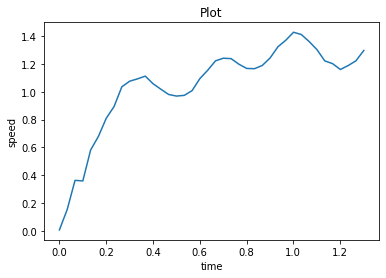

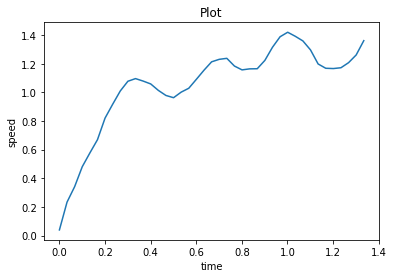

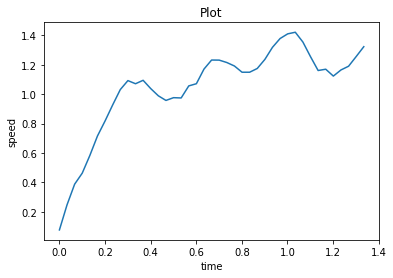

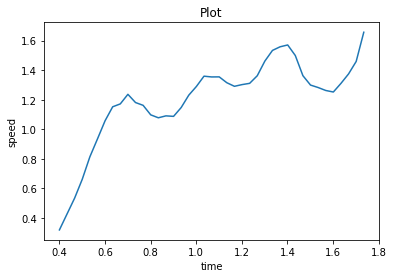

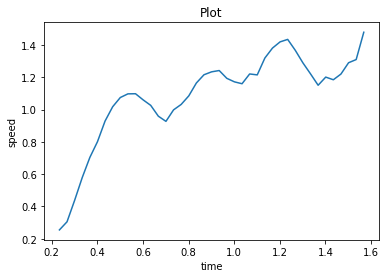

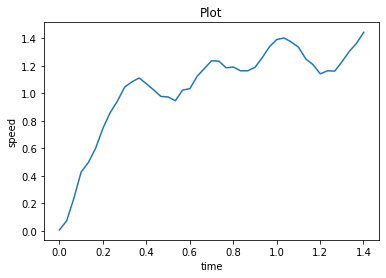

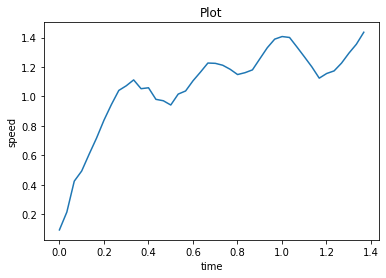

In [7]:

speeds = []
for run in runs:
    speed = get_speed(run)
    speeds.append(speed)
    plot_speed(run[0,:-1], speed)

#plot(data[1:,0], speeds[1:])

In [8]:
def uncertain_final_speed(speeds):
    final_speed = [speed[-1] for speed in speeds]
    average_final_speed = np.average(final_speed)
    standard_deviation = np.std(final_speed)
    standard_error = standard_deviation/np.sqrt(len(final_speed))
    return average_final_speed, standard_error

In [10]:
final_speed = uncertain_final_speed(speeds)
print(f"The final speed of the ball is {final_speed[0]}m/s +/- {final_speed[1]}m/S")

The final speed of the ball is 1.42918647806945m/s +/- 0.03314532930053832m/S
